In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Kernel Density Estimation

It allows us to estimate the probability density function from our finite dataset.
We are able to do this in a **non-parametric** way, that means we aren't assuming any underlying distribution for our data.

# Seaborn KDEplot

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [23]:
#Import the dataset
cars = sns.load_dataset("mpg").dropna()

In [24]:
cars.shape

(392, 9)

In [25]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [26]:
hp = cars.horsepower

/var/folders/bx/k92nrz991g36hb9xfqggst7m0000gn/T/ipykernel_57287/2058621840.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp, rug=True, kde=False, hist=False)


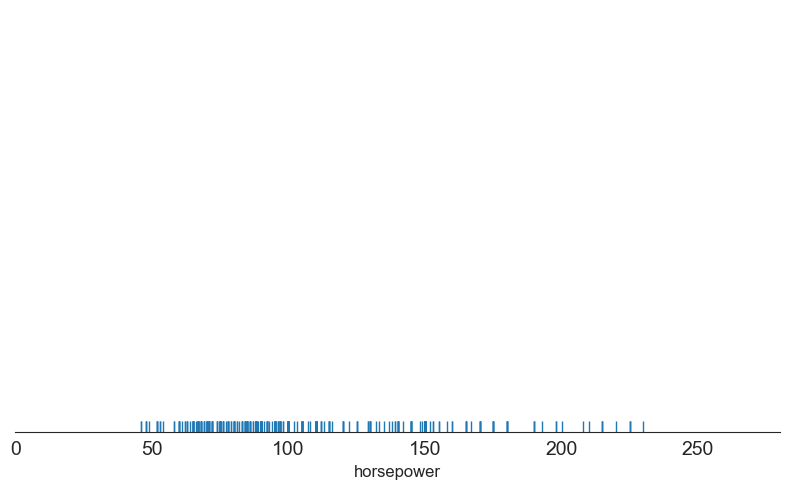

In [27]:
#the distribution of the horsepower values
plt.figure(figsize=(8,5))

sns.distplot(hp, rug=True, kde=False, hist=False)

sns.despine(left=True) #remove the contours of the plot
plt.xlim(0, 280)
plt.xlabel('horsepower',fontsize=12)
plt.yticks([])
plt.tight_layout();

<Figure size 800x500 with 0 Axes>

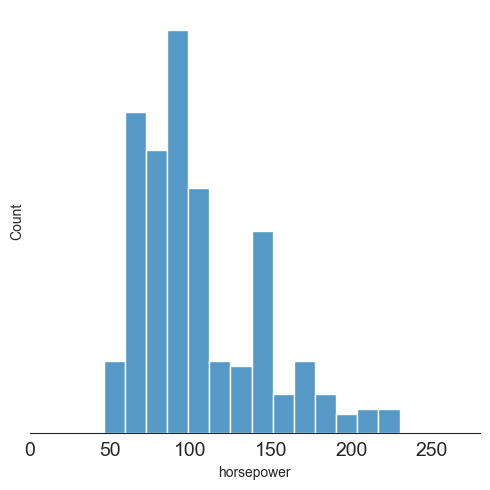

In [28]:
#the histogram distribution of the horsepower values
plt.figure(figsize=(8,5))

sns.displot(hp, kde=False)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('horsepower')
plt.yticks([])
plt.tight_layout();

AttributeError: Rectangle.set() got an unexpected keyword argument 'hist_kws'

<Figure size 800x500 with 0 Axes>

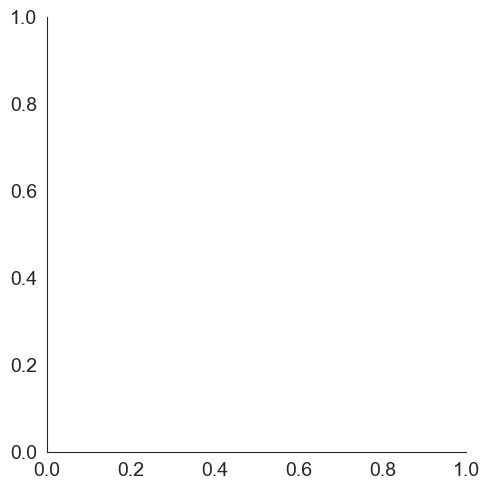

In [68]:
plt.figure(figsize=(8,5))
#sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})
#display the kernel density estimation with a line width of 5 and the histogram with an alpha of 0.25
sns.displot(hp, kde=True)


plt.xlabel('horsepower')
plt.yticks([])
plt.tight_layout();

# "How It Works" Visuals

In [30]:
import numpy as np
import scipy.stats as stats

In [31]:
blue, orange, green, red = sns.color_palette()[:4]

In [32]:
pts = [1, 3, 3.5, 4, 6, 8]

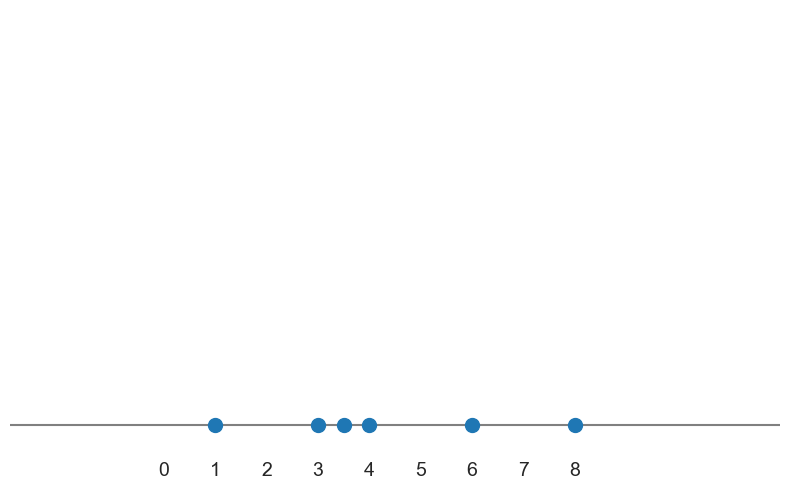

In [33]:
plt.figure(figsize=(8, 5))

plt.scatter(pts, [0]*len(pts), s=100, zorder=1)

plt.axhline(0, color='gray', zorder=0)

plt.ylim(-0.1, 1.5)
plt.xlim(-3, 12)

plt.box(False)

plt.xticks(range(9))
plt.yticks([])
plt.tight_layout()

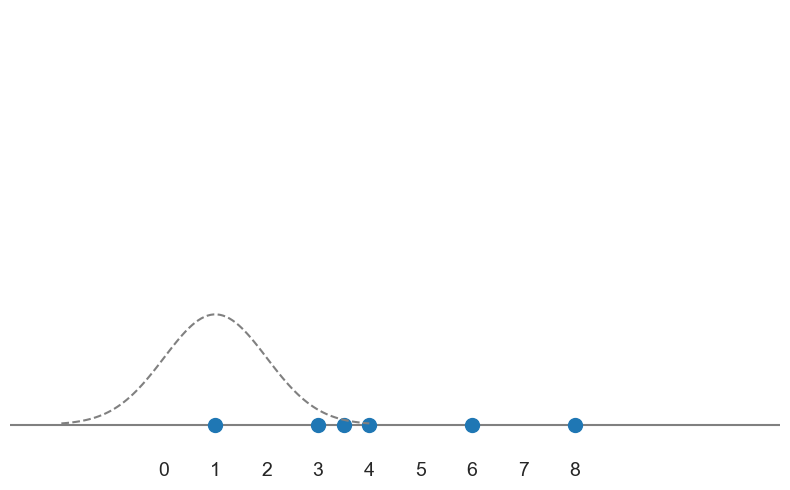

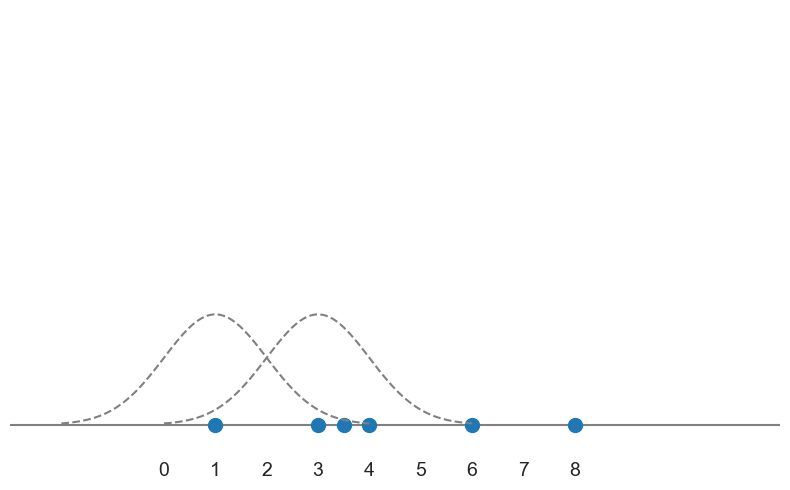

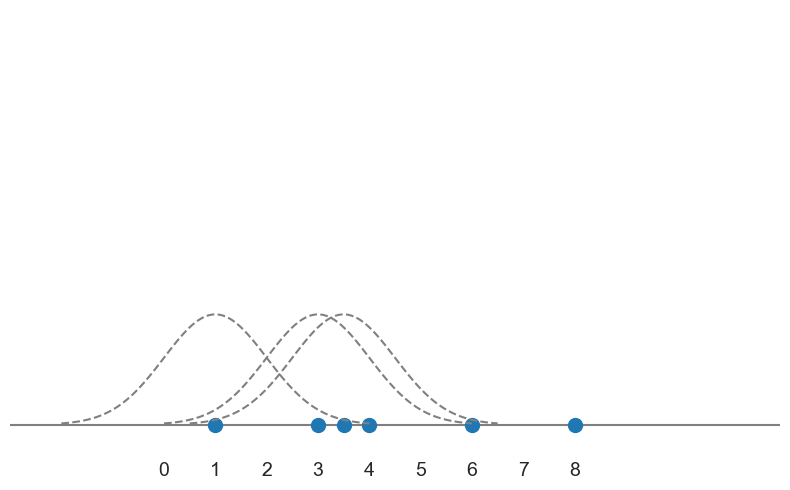

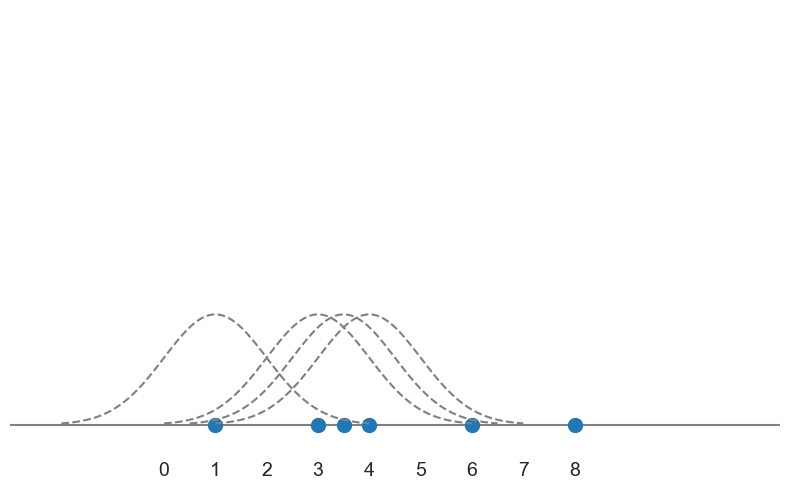

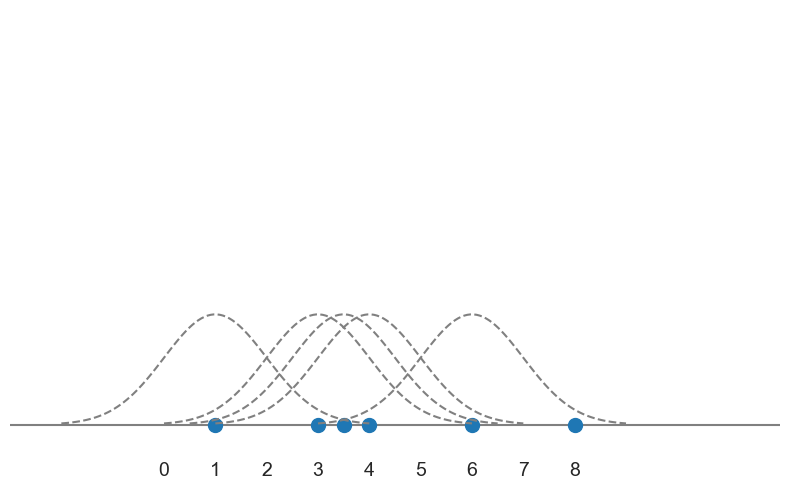

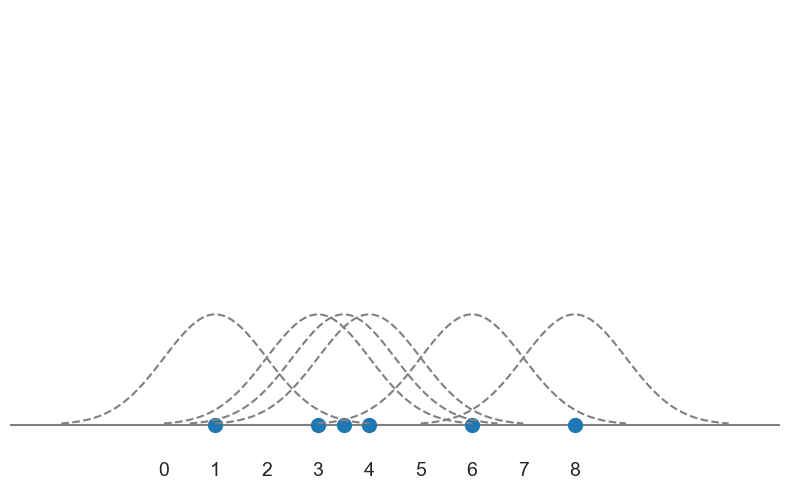

In [34]:
#for each point of the "fake" dataset plot a "gaussian window"
for i in range(len(pts)):
    plt.figure(figsize=(8, 5))
    for point in pts[0:i+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout()

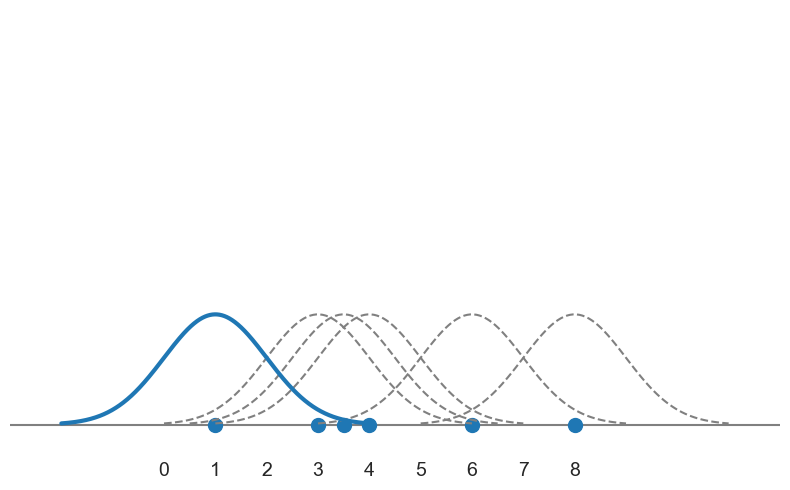

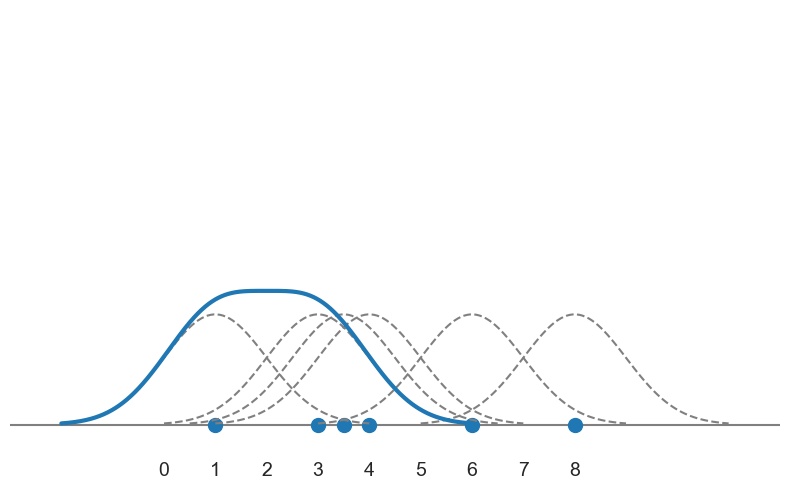

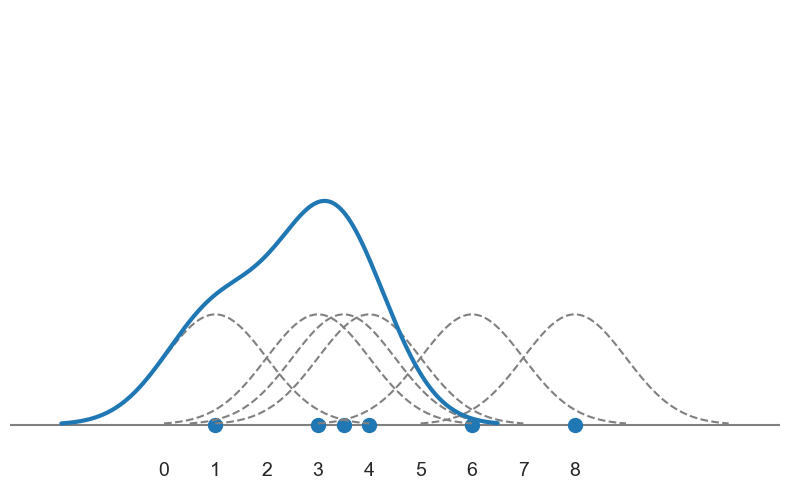

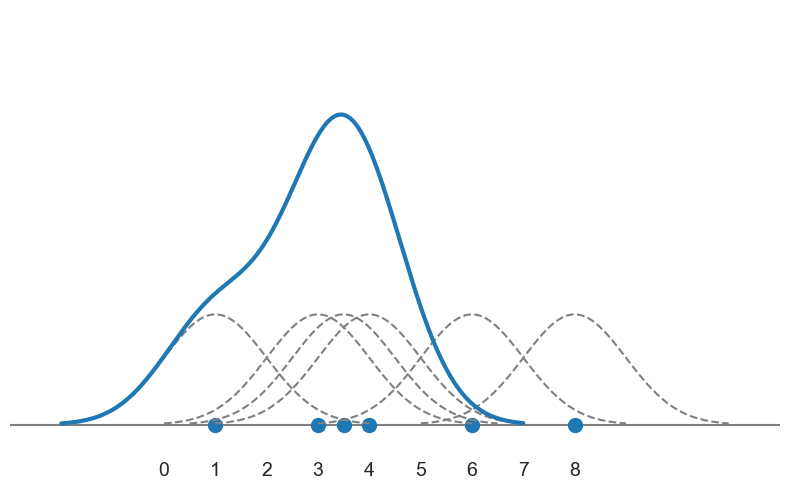

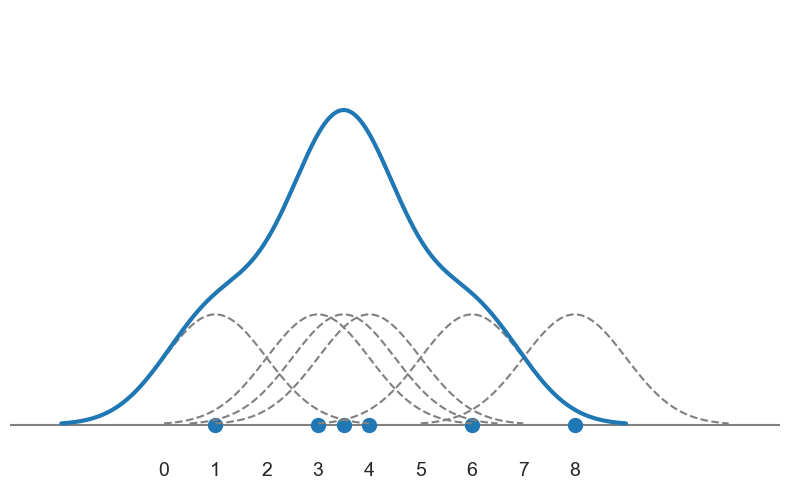

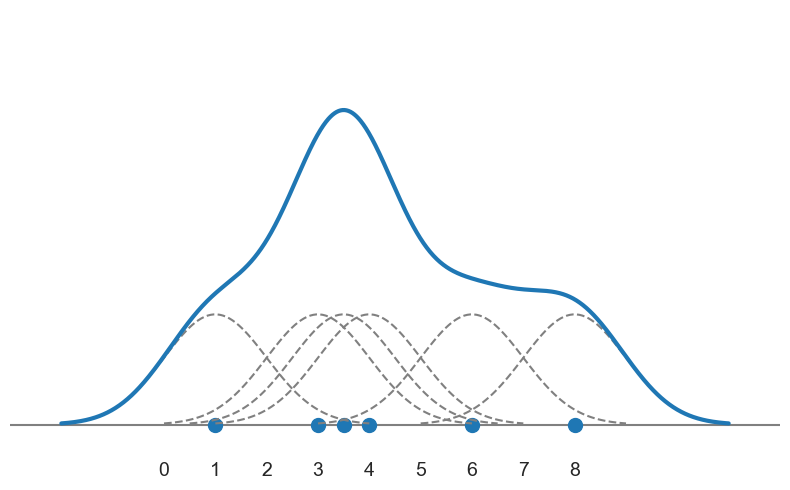

In [35]:
for i in range(1, len(pts)+1):
    plt.figure(figsize=(8, 5))
    for point in pts[0:len(pts)+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)

    total_x = np.linspace(pts[0] - 3*sigma, pts[i-1] + 3*sigma, 1000)
    total = sum([stats.norm.pdf(total_x, pts[j], sigma) for j in range(i)])
    plt.plot(total_x, total, color=blue, lw=3)
    
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();

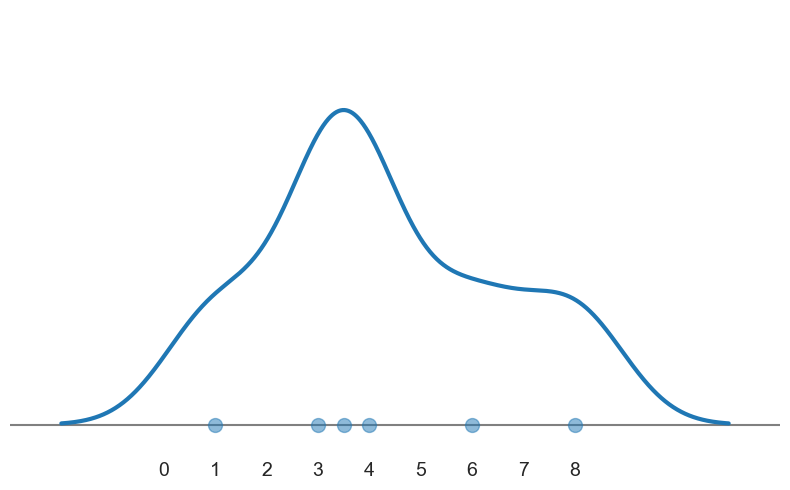

In [36]:
#final plott of resulting ditribution 
plt.figure(figsize=(8,5))
plt.plot(total_x, total, color=blue, lw=3)
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, alpha=0.5)
plt.axhline(0, color='gray', zorder=0)
plt.xlim(-3, 12)
plt.ylim(-0.1, 1.5)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

# Repeat the same process, but on the dataset, using the sns library

<AxesSubplot: xlabel='horsepower', ylabel='Density'>

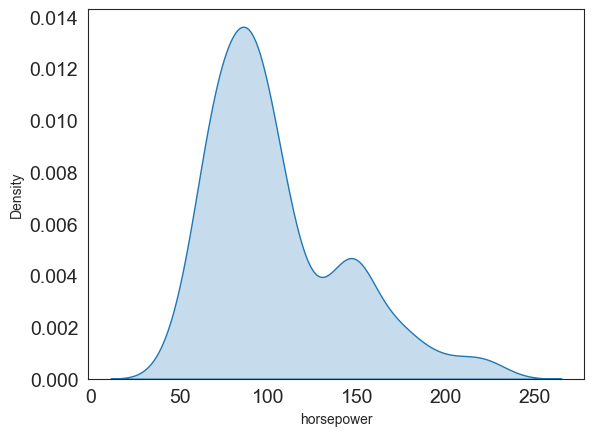

In [37]:
sns.kdeplot(cars.horsepower, shade=True) #kernel density estimatiion plot for the horsepower in our dataset

# Let's try to vary the bandwidth value

In [38]:
from ipywidgets import interact, interactive, HBox, VBox, interactive_output

from IPython.display import display

In [42]:
def bandwidth_widget(bw=0.01):
    sns.kdeplot(cars.horsepower, bw_method=bw, lw=3, shade=True)
    plt.xlim(0, 250)
    plt.ylim(0, 0.05)

In [43]:
interactive(bandwidth_widget, bw_method=(0.001, 1, 0.0001))

interactive(children=(FloatSlider(value=0.01, description='bw', max=0.03, min=-0.01), Output()), _dom_classes=…